# Redes do Mundo-pequeno e de livre-escala

#### 1 - Importando bibliotecas e carregando redes

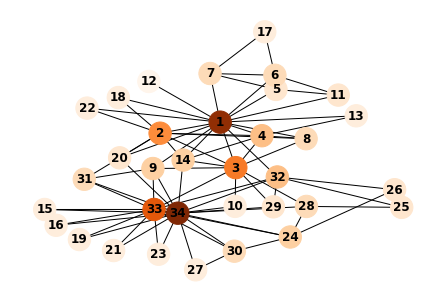

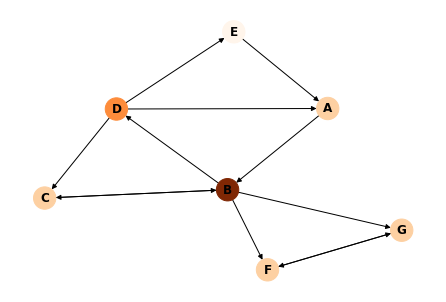

In [1]:
import networkx as nx
import collections
#from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Karate-club
K = nx.karate_club_graph()
K = nx.convert_node_labels_to_integers(K, first_label=1)

colors = []
for v in K:
    colors.append(K.degree(v))

nx.draw_kamada_kawai(K, node_color=colors, with_labels=True, cmap=plt.cm.Oranges, node_size=500, font_weight='bold')

plt.show()

#Rede direcionada
DG = nx.DiGraph()
DG.add_edges_from([('D','A'),('D','C'),('D','E'),
                  ('E','A'),('A','B'),('B','C'),
                  ('B','D'),('C','B'),('C','B')])
DG.add_edges_from([('B','F'),('B','G'),('G','F'),('F','G')])


colors = []
for v in DG:
    colors.append(DG.degree(v));

nx.draw_kamada_kawai(DG, node_color=colors, with_labels=True, cmap=plt.cm.Oranges, node_size=500, font_weight='bold')
plt.show()

#### 2 - Distribuição de probabilidade dos nós da rede

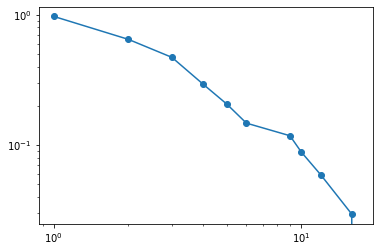

In [2]:
G = nx.Graph(DG.to_undirected())

def length_of_list(list_of_numbers, number):
     x = [i for i in list_of_numbers if i > number]
     return len(x)
     
dictlist = []
px = []

for key, value in K.degree():
    dictlist.append(value)

for z in sorted(set(dictlist)):
    px.append(length_of_list(dictlist, z)/len(dictlist))

plt.loglog(sorted(set(dictlist)), px, marker='o')


#### 3 - Preferential Attachment

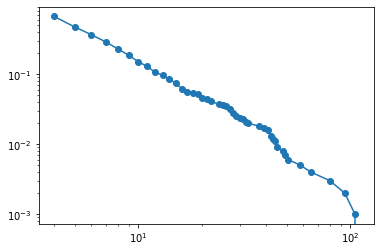

In [3]:
G2 = nx.barabasi_albert_graph(1000, 4)

dictlist = []
px = []

for key, value in G2.degree():
    dictlist.append(value)

for z in sorted(set(dictlist)):
    px.append(length_of_list(dictlist, z)/len(dictlist))

plt.loglog(sorted(set(dictlist)), px, marker='o')


In [4]:
nx.average_clustering(G2)

0.03496515183925589

In [5]:
nx.average_shortest_path_length(G2)

3.1727867867867867

#### 4 - Redes Small-World

In [6]:
G3 = nx.watts_strogatz_graph(1000,6,0.000111)

In [7]:
nx.average_clustering(G3)

0.6000000000000113

In [8]:
nx.average_shortest_path_length(G3)

83.75075075075075